In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data loading and assembly

In [94]:
spectra = pd.read_csv('../data/dataset.csv')
columns = ['target', 'sampleID'] 
columns.extend([str(x) for x in range(950, 1530+1,2)])
spectra = spectra[columns]
print(spectra.shape)
spectra.head()

(698, 293)


,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,94.333333,0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,94.333333,0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,94.333333,0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,94.333333,0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,76.333333,1,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


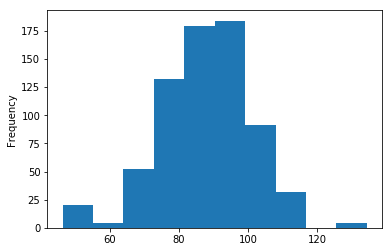

In [95]:
spectra['target'].plot.hist()

In [96]:
#spectra = spectra[spectra['target'] < 100]
spectra.shape

(698, 293)

# Dataset clean ?

In [97]:
spectra.describe()

,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,...,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,87.867001,88.361032,35.075930,34.089405,33.118207,32.248728,31.512126,30.961026,30.527884,30.184520,...,0.642378,0.717119,0.779950,0.821864,0.881985,0.945085,1.006667,1.069775,1.134070,1.199629
std,13.327779,51.000422,2.030035,2.060834,2.089150,2.111065,2.129829,2.145836,2.150767,2.153461,...,0.686442,0.693758,0.699668,0.704813,0.711064,0.717485,0.724458,0.731790,0.738503,0.745828
min,46.333333,0.000000,26.655676,25.505169,24.395685,23.420492,22.587944,21.945278,21.496870,21.147123,...,-1.764682,-1.726724,-1.690527,-1.660725,-1.626905,-1.592568,-1.559861,-1.527287,-1.488511,-1.451741
25%,80.000000,44.250000,34.081783,33.112638,32.129796,31.271699,30.559600,30.006750,29.585270,29.244950,...,0.238126,0.316725,0.373221,0.403003,0.462925,0.522936,0.587332,0.652647,0.715998,0.776902
50%,88.000000,88.000000,35.383537,34.404322,33.446087,32.584858,31.861850,31.307280,30.874285,30.531601,...,0.632675,0.710483,0.777476,0.820467,0.884216,0.946825,1.012075,1.078114,1.142786,1.210467
75%,96.000000,132.000000,36.358374,35.383751,34.438153,33.573155,32.844104,32.324157,31.889494,31.551481,...,1.084671,1.158659,1.218695,1.270178,1.330560,1.392627,1.460363,1.528732,1.594301,1.659343
max,134.333333,177.000000,42.143303,41.016056,39.927353,38.940678,38.071739,37.357346,36.864861,36.467106,...,2.929408,2.975907,3.031236,3.091215,3.146902,3.201092,3.255369,3.311751,3.375964,3.431573


In [98]:
spectra.isnull().sum().sum()

0

In [99]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Columns: 293 entries, target to 1530
dtypes: float64(292), int64(1)
memory usage: 1.6 MB


# Possible outliers cleaning

In [100]:
spectra = spectra[spectra['target'] >  70]
spectra = spectra[spectra['target'] < 105]
spectra.shape

(591, 293)

# Target description

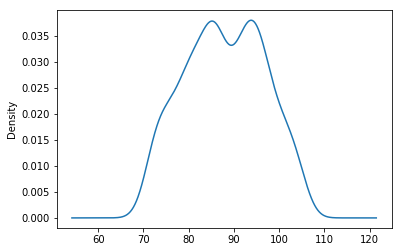

In [101]:
spectra['target'].plot.density()

In [102]:
# The closer to 0, the better
spectra['target'].skew()


-0.031504138888319426

In [103]:
from scipy.special import inv_boxcox
from scipy import stats
spectra['targetBC'], lmbda = stats.boxcox(spectra['target'])

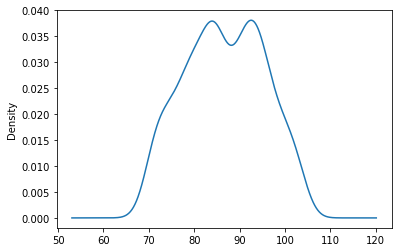

-0.031632930989971296

In [104]:
spectra['targetBC'].plot.density()
plt.show()
spectra['targetBC'].skew()

# SampleID  aggregation

In [105]:
spectra[['target']].describe()

,target
count,591.000000
mean,87.928652
std,8.783686
min,71.000000
25%,81.000000
50%,87.333333
75%,94.666667
max,104.666667


OrderedDict([(0.0, 71.0), (0.25, 81.0), (0.5, 87.33333333333331), (0.75, 94.66666666666669), (1.0, 104.66666666666669)])


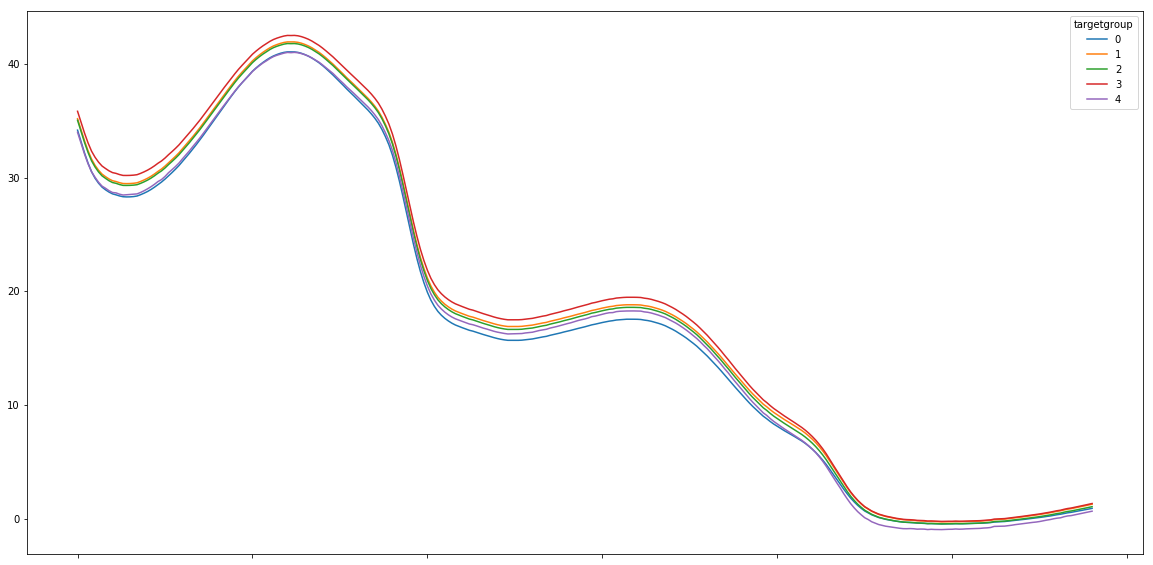

In [106]:
import collections
groupnumber = 5
# defines quant group
quants = spectra['target'].quantile(np.linspace(0, 1, groupnumber)).to_dict()
print(collections.OrderedDict(sorted(quants.items())))
def quantplacement(entry):
    index = -1
    for key,value in collections.OrderedDict(sorted(quants.items())).items():
        if entry < value:
            return index
        index += 1
    return index
        
spectra['targetgroup']=spectra['target'].apply(quantplacement)
spectra.drop(['target', 'targetBC', 'sampleID'], axis=1).groupby('targetgroup').mean().T.plot(figsize=(20,10))
plt.show()


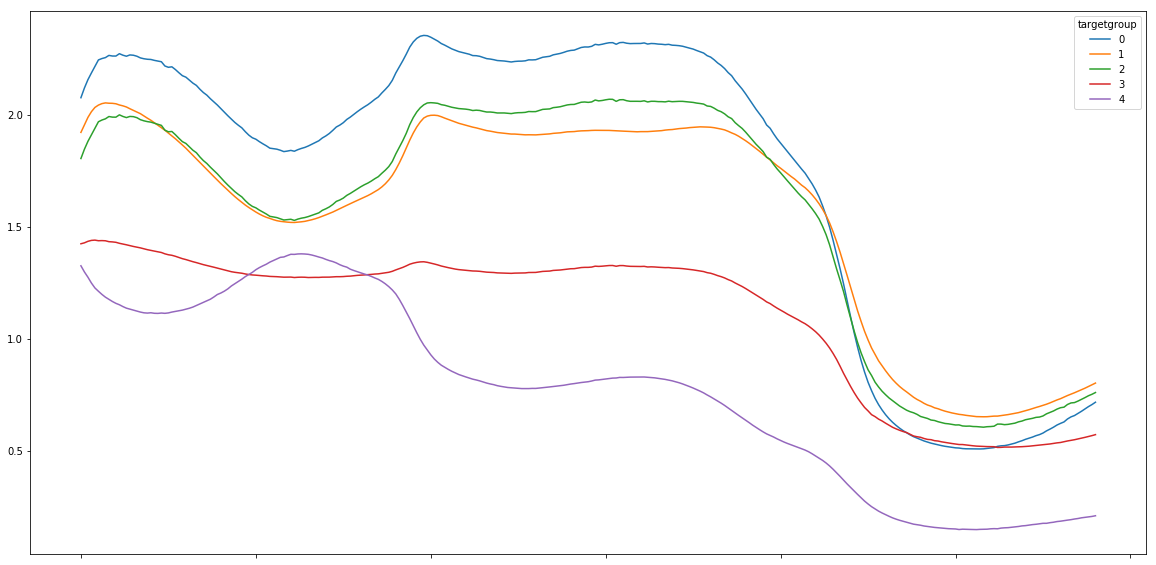

In [107]:
#Standard deviation
spectra.drop(['target', 'targetBC', 'sampleID'], axis=1).groupby('targetgroup').std().T.plot(figsize=(20,10))

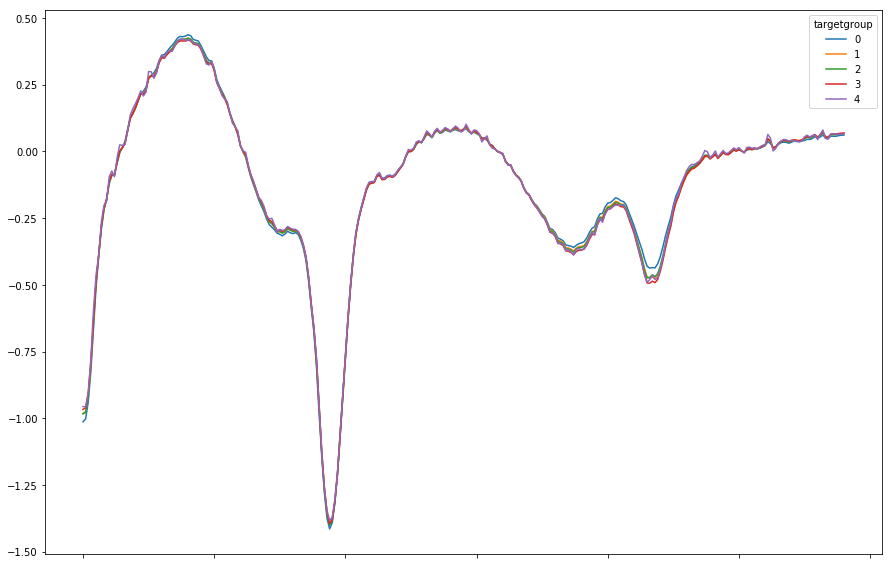

In [108]:
#spectra.groupby('targetgroup').mean()[[str(x) for x in range(950, 1530+1,2)]].T.plot()

def gradient(entry):
    #print(entry)
    return np.gradient(entry)

subset = spectra[[str(x) for x in range(950, 1530+1,2)]].apply(gradient, axis=1)
df = pd.concat((spectra[['targetgroup']], subset), axis=1)

df.groupby('targetgroup').mean().T.plot(figsize=(15,10))

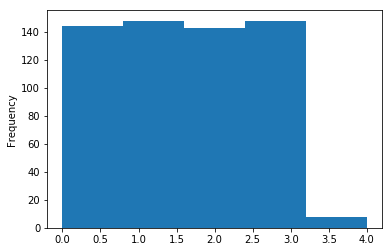

In [109]:
spectra['targetgroup'].plot.hist(bins = groupnumber)

In [110]:
spectra[spectra['targetgroup']==groupnumber-1]

,target,sampleID,950,952,954,956,958,960,962,964,...,1516,1518,1520,1522,1524,1526,1528,1530,targetBC,targetgroup
550,104.666667,140,34.647984,33.670601,32.682674,31.814377,31.096958,30.592859,30.145847,29.795107,...,0.634059,0.670364,0.737094,0.810439,0.880395,0.948833,1.016546,1.083668,103.360491,4
551,104.666667,140,34.234165,33.311920,32.377419,31.552559,30.869392,30.387072,29.956377,29.616903,...,0.494504,0.527758,0.592042,0.661595,0.726018,0.791471,0.855048,0.923750,103.360491,4
552,104.666667,140,31.956987,31.054888,30.145386,29.345482,28.686649,28.228344,27.816227,27.495508,...,0.206279,0.236270,0.295920,0.361172,0.422018,0.481201,0.540008,0.605116,103.360491,4
553,104.666667,140,32.288803,31.360378,30.418793,29.595940,28.917799,28.443398,28.023672,27.696703,...,0.050413,0.080668,0.140813,0.203911,0.265813,0.329829,0.388363,0.444130,103.360491,4
570,104.666667,145,35.911911,34.918598,33.929260,33.040726,32.307068,31.798397,31.338205,30.975163,...,0.205192,0.231127,0.293279,0.361459,0.426671,0.490741,0.554189,0.625119,103.360491,4
571,104.666667,145,34.999714,34.025970,33.052509,32.186222,31.473162,30.980991,30.542759,30.199951,...,0.257069,0.286211,0.351100,0.420408,0.489397,0.558257,0.624882,0.699085,103.360491,4
572,104.666667,145,33.745316,32.794510,31.847389,31.002329,30.310143,29.840420,29.413689,29.079769,...,0.283101,0.309535,0.370812,0.437627,0.502103,0.566591,0.627711,0.694917,103.360491,4
573,104.666667,145,34.076981,33.079758,32.086838,31.198103,30.466848,29.964396,29.517660,29.168741,...,0.133066,0.158609,0.218217,0.281833,0.345472,0.409715,0.471238,0.530228,103.360491,4


In [209]:
spectra['target'].value_counts().idxmax()

83.66666666666667

In [329]:
df = spectra[spectra['target'] == 92]
df.shape

(12, 295)

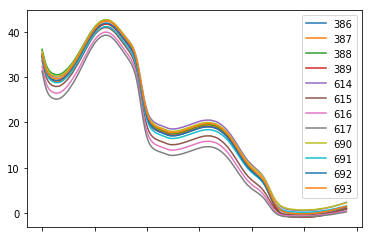

In [330]:
df[[str(x) for x in range(950, 1530+1,2)]].T.plot()

In [338]:
df['sampleID'].unique()

array([ 98, 156, 176])

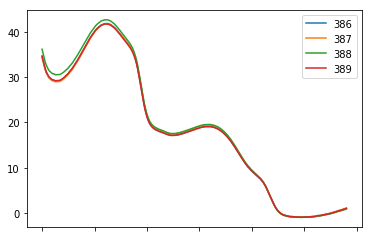

In [335]:
subset = spectra[spectra['sampleID'] == 98]
subset[[str(x) for x in range(950, 1530+1,2)]].T.plot()

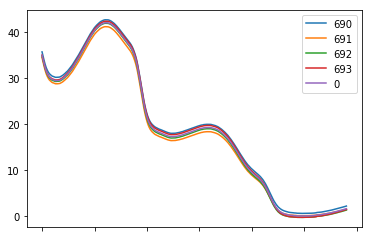

In [343]:
subset = spectra[spectra['sampleID'] == 176]
subset = subset.append(subset.mean(axis=0).to_frame().T, ignore_index=False)
subset[[str(x) for x in range(950, 1530+1,2)]].T.plot()

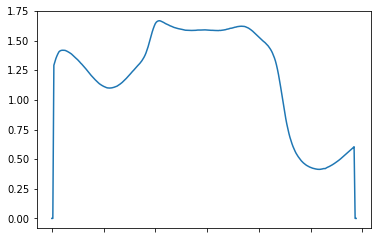

In [272]:
subset.loc[0].plot()

In [259]:
subset

,target,sampleID,950,952,954,956,958,960,962,964,...,1516,1518,1520,1522,1524,1526,1528,1530,targetBC,targetgroup
12,77.0,3,35.034103,34.039745,33.086369,32.212536,31.449699,30.838572,30.410099,30.062510,...,0.598044,0.652150,0.708091,0.763640,0.816635,0.870561,0.933479,0.996358,75.793411,0
13,77.0,3,35.030643,34.039936,33.090080,32.218369,31.460070,30.858452,30.428280,30.080444,...,0.591258,0.647203,0.704655,0.764374,0.821112,0.877549,0.942376,1.009185,75.793411,0
14,77.0,3,32.778290,31.737532,30.737114,29.828854,29.038198,28.406471,27.965183,27.610411,...,-0.355929,-0.317810,-0.276953,-0.236397,-0.197997,-0.158810,-0.112478,-0.066361,75.793411,0
15,77.0,3,32.809967,31.763180,30.762665,29.849508,29.053724,28.417753,27.976765,27.622873,...,-0.354527,-0.310378,-0.264286,-0.218030,-0.173474,-0.128864,-0.075934,-0.021637,75.793411,0


# Regression

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union

## Folds definition

In [112]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

## Savgol filter

https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter

In [82]:
from scipy.signal import savgol_filter

class Savgol(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    def __init__(self, params={}, columns=[str(x) for x in range(950, 1530+1,2)]):
        self.params = params
        self.columns = columns
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X[self.columns]
        return df.apply(lambda x:savgol_filter(x, **self.params), axis=1)
    
savgol = Savgol(params={'window_length':5, 'polyorder':2})
savgol.fit_transform(spectra).shape

(698, 291)

In [83]:
#df = pd.DataFrame([[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9]])
#savgol.fit_transform(df)
spectra.head()

,target,sampleID,950,952,954,956,958,960,962,964,...,1516,1518,1520,1522,1524,1526,1528,1530,targetBC,targetgroup
0,94.333333,0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,...,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571,864.330882,2
1,94.333333,0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,...,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826,864.330882,2
2,94.333333,0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,...,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850,864.330882,2
3,94.333333,0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,...,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516,864.330882,2
4,76.333333,1,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,...,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842,617.195998,0


## Column selection

In [84]:
class Colselect(BaseEstimator, TransformerMixin):
    def __init__(self, columns=[]):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.columns]

#colselect = Colselect(['sampleID'])
#colselect.fit_transform(spectra).shape

## Blocs creation

In [85]:
savgol = Savgol({'window_length':5, 'polyorder':2})
savgol.fit_transform(spectra).shape

(698, 291)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [88]:
from sklearn.decomposition import PCA
pca = PCA()

In [89]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(random_state=0, max_iter=10000)

## Pipe creation

In [25]:


#lrpipelist = [('scaler', scaler), ('pca', pca), ('elnet', elnet)]
lrpipelist = [('savgol', savgol), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
#lrpipelist = [('union', union), ('scaler', scaler), ('elnet', elnet)]
lrpipe = Pipeline(lrpipelist)

In [27]:
params={
        #'pca__n_components':[5, None],
        #'kridge__alpha':[0, 1e-1, 1e-3, 1e-4], #np.logspace(-10,-2,5),
        #'kridge__gamma':np.linspace(1e-5,1,5),
        #'kridge__kernel':['polynomial', 'linear', 'rbf'],
        'elnet__alpha':np.logspace(-6,-2,3),
        'elnet__l1_ratio':np.linspace(1e-5,1,3),
       }

In [28]:
lrgrid = GridSearchCV(lrpipe, params, cv=kf, scoring='neg_mean_squared_error', verbose=0, n_jobs=-2)
lrgrid.fit(spectra,spectra['targetBC'])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('savgol', Savgol(columns=['950', '952', '954', '956', '958', '960', '962', '964', '966', '968', '970', '972', '974', '976', '978', '980', '982', '984', '986', '988', '990', '992', '994', '996', '998', '1000', '1002', '1004', '1006', '1008', '1010', '1012', '1014', '1016', '1018', '1020', '10...e=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'elnet__alpha': array([1.e-06, 1.e-04, 1.e-02]), 'elnet__l1_ratio': array([1.00000e-05, 5.00005e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [29]:
lrgrid.best_score_

-8.383504423636414e-05

In [30]:
lrgrid.best_params_

{'elnet__alpha': 1e-06, 'elnet__l1_ratio': 1.0}

In [31]:
#bestparams = {k[8:]:v  for k,v in lrgrid.best_params_.items() if k.startswith('kridge__')}
#kridge = KernelRidge(**bestparams)

bestparams = {k[7:]:v  for k,v in lrgrid.best_params_.items() if k.startswith('elnet__')}
elnet = ElasticNet(random_state=0, max_iter=10000, **bestparams)

lrpipelist = [('savgol', savgol), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
#lrpipelist = [('union', union), ('scaler', scaler),  ('kridge', kridge)]
lrpipe = Pipeline(lrpipelist)
cross_val_score(lrpipe, spectra,spectra['targetBC'], cv=kf, scoring='neg_mean_squared_error').mean()

-8.159136891763915e-05

In [32]:
preds = cross_val_predict(lrpipe, spectra,spectra['targetBC'], cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, spectra['target'])

4.694259404094106e-07

In [33]:
mean_squared_error(ypred, spectra['target'])**.5

0.000685146656132401

### HyperOpt

In [90]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [113]:
counter = 0
bestscore = 1e20

def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        'alpha': params['alpha'],
        'l1_ratio': params['l1_ratio'],
        'random_state': 0,
        'max_iter':10000,
        }
    
    #print(hyperparams)
    
    elnet = ElasticNet(**hyperparams)

    pipe = [('savgol', savgol), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
    #pipe = [('scaler', scaler), ('pca', pca), ('elnet', elnet)]
    regpip = Pipeline(pipe)    
    
    preds = cross_val_predict(regpip, spectra,spectra['targetBC'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , inv_boxcox(preds, lmbda))
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    if counter % 10 == 0:
        print("{} - RMSE {}".format(counter, score**.5))
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, hyperparams))
    return score

space = {
    'alpha': hp.loguniform('alpha', -6, 2),
    'l1_ratio': hp.loguniform('l1_ratio',-6, 0),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=200)

1 - RMSECV 7.018479641481506 - {'alpha': 0.028325664693669678, 'l1_ratio': 0.18219289921091966, 'random_state': 0, 'max_iter': 10000}
10 - RMSE 7.2700892725643484
14 - RMSECV 6.4241239904991 - {'alpha': 0.005404842486922819, 'l1_ratio': 0.11539818968834663, 'random_state': 0, 'max_iter': 10000}
20 - RMSE 7.31110884261006
22 - RMSECV 6.30882505207848 - {'alpha': 0.004304869567698018, 'l1_ratio': 0.0338892848017541, 'random_state': 0, 'max_iter': 10000}
23 - RMSECV 6.257271169353375 - {'alpha': 0.003432391421298317, 'l1_ratio': 0.021420100168319304, 'random_state': 0, 'max_iter': 10000}
24 - RMSECV 6.083866188645244 - {'alpha': 0.002502685327000099, 'l1_ratio': 0.019165651744065794, 'random_state': 0, 'max_iter': 10000}
28 - RMSECV 6.0718189842914185 - {'alpha': 0.0024915912554061346, 'l1_ratio': 0.004002830833969473, 'random_state': 0, 'max_iter': 10000}
30 - RMSE 6.62946581212724
40 - RMSE 8.083993765681637
50 - RMSE 8.119684216730617
60 - RMSE 7.622265494811253
70 - RMSE 6.19237314957

In [114]:
params = {
        'alpha': best['alpha'],
        'l1_ratio': best['l1_ratio'],
        'random_state': 0,
        'max_iter':10000,
        }
params# = {'alpha': 0.0025463439947105786, 'l1_ratio': 0.9987487227563826, 'max_iter': 10000, 'random_state': 0}

{'alpha': 0.0025463439947105786,
 'l1_ratio': 0.9987487227563826,
 'max_iter': 10000,
 'random_state': 0}

In [277]:
elnet = ElasticNet(**params)
pipe = [('savgol', savgol), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
regpip = Pipeline(pipe)

preds = cross_val_predict(regpip, spectra,spectra['targetBC'], cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, spectra['target'])

22.451822486190625

In [278]:
mean_squared_error(ypred, spectra['target'])**.5

4.738335413010631

## Coeff verification

In [279]:
regpip.fit(spectra,spectra['targetBC'])
regpip.named_steps['elnet'].coef_[:20]

array([-1.42809113e-01, -3.82257737e-01, -2.04940988e-02,  1.77113662e+00,
       -4.51255832e+00, -3.26808921e+00,  4.63288035e+00, -5.30786759e+00,
       -2.43610825e+00,  1.53800329e+01,  5.27990894e+01, -4.38400727e+01,
        1.04935093e+01,  2.97712071e+01, -7.82049672e+00,  1.92051041e+02,
       -5.01018762e+01, -0.00000000e+00,  2.65532496e+01,  0.00000000e+00])

In [280]:
regpip.named_steps['elnet'].coef_.max()

192.05104124883354

In [281]:
regpip.named_steps['elnet'].coef_.min()

-50.10187615041426

## Score accuracy

In [282]:
df = pd.DataFrame({'target':spectra['target'], 'pred':ypred, 'targetgroup':spectra['targetgroup'], 'sampleID':spectra['sampleID'],}) #
df.head()

,pred,sampleID,target,targetgroup
0,96.866618,0,94.333333,2
1,95.425279,0,94.333333,2
2,96.492648,0,94.333333,2
3,95.679566,0,94.333333,2
4,80.475576,1,76.333333,0


In [283]:
df['delta'] = df['target'] - df['pred']
df['deltaabs'] = np.abs(df['delta'])
df.head()

,pred,sampleID,target,targetgroup,delta,deltaabs
0,96.866618,0,94.333333,2,-2.533285,2.533285
1,95.425279,0,94.333333,2,-1.091945,1.091945
2,96.492648,0,94.333333,2,-2.159315,2.159315
3,95.679566,0,94.333333,2,-1.346233,1.346233
4,80.475576,1,76.333333,0,-4.142243,4.142243


In [284]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [.1, .25, .5 ,1 ,2 ,3 ,4 ,6 ,8, 10]:
    correctcount = df[df['deltaabs'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 591
prediction +/- 0.1 : percent 01.52 %
prediction +/- 0.2 : percent 04.57 %
prediction +/- 0.5 : percent 09.31 %
prediction +/- 1.0 : percent 16.58 %
prediction +/- 2.0 : percent 31.13 %
prediction +/- 3.0 : percent 46.36 %
prediction +/- 4.0 : percent 59.39 %
prediction +/- 6.0 : percent 78.68 %
prediction +/- 8.0 : percent 91.03 %
prediction +/- 10.0 : percent 96.79 %


In [285]:
df[['delta']].describe()

,delta
count,591.000000
mean,0.016889
std,4.742319
min,-12.759515
25%,-3.273153
50%,-0.180461
75%,3.259806
max,16.748259


In [286]:
import seaborn as sns

/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


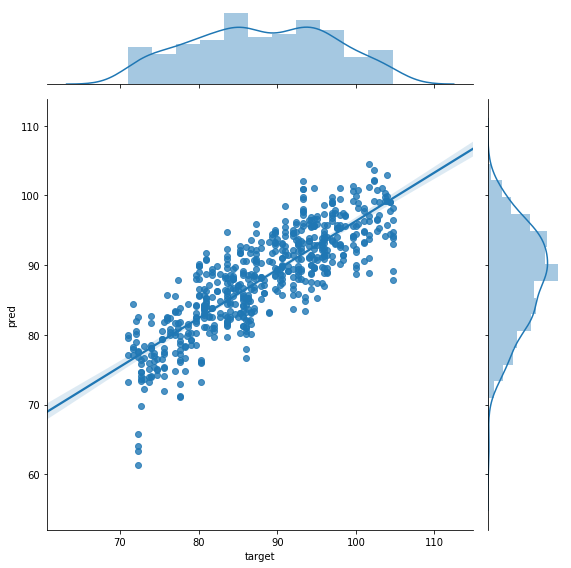

In [287]:

sns.jointplot(x='target', y='pred', data=df, kind='reg', size=8, stat_func=None)
plt.show()

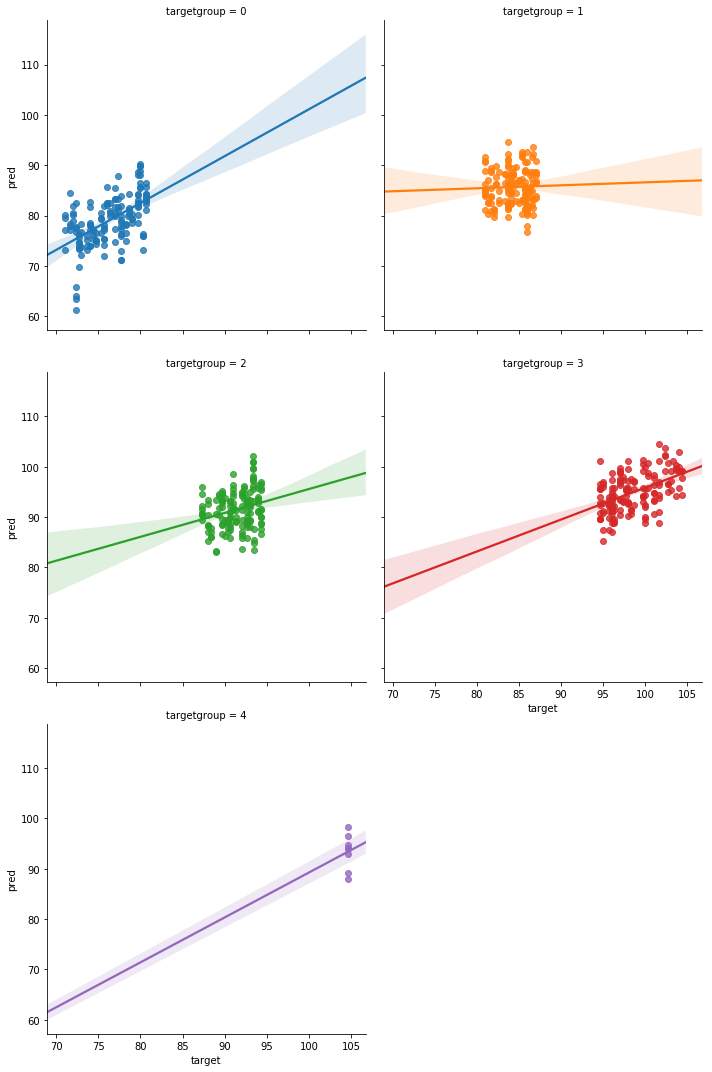

In [288]:
sns.lmplot(x='target',
           y='pred',
           col='targetgroup',
           hue='targetgroup',
           data=df,
           aspect=1,
           col_wrap=2,
           size=5,
           legend=True)
plt.show()

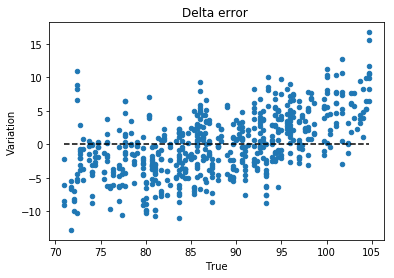

,delta
count,591.000000
mean,0.016889
std,4.742319
min,-12.759515
25%,-3.273153
50%,-0.180461
75%,3.259806
max,16.748259


In [289]:

df.plot.scatter('target', 'delta')
plt.plot([df['target'].min(), df['target'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error ')
plt.xlabel('True')
plt.ylabel('Variation')
plt.show()
df[['delta']].describe()

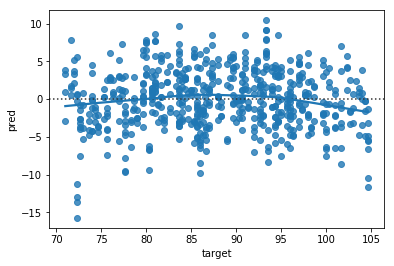

In [301]:
sns.residplot(x='target', y='pred', data=df, lowess=True)

In [142]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge()

In [133]:
from sklearn.svm import SVR
svr = SVR()

In [309]:
counter = 0
bestscore = 1e20

def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        'gamma': params['gamma'],
        'alpha': params['alpha'],
        'kernel':  params['kernel'],
        'degree': 2,
        #'max_iter':10000,
        }
    
    #print(hyperparams)
    
    krr = KernelRidge(**hyperparams)

    pipe = [('savgol', savgol), ('scaler', scaler), ('pca', pca), ('krr', krr)]
    #pipe = [('scaler', scaler), ('pca', pca), ('elnet', elnet)]
    regpip = Pipeline(pipe)    
    
    #preds = cross_val_predict(regpip, spectra,spectra['targetBC'], cv=kf, n_jobs=-2)
    #score = mean_squared_error(spectra['target'] , inv_boxcox(preds, lmbda))
    
    preds = cross_val_predict(regpip, spectra, spectra['target'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , preds)
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    
    if counter % 10 == 0:
        print("{} - RMSE {}".format(counter, score**.5))
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, hyperparams))
    return score

space = {
    'gamma': hp.loguniform('gamma', -3, 1),
    'alpha': hp.loguniform('alpha',-3, 0),
    'kernel':hp.choice('kernel', ['poly']) #
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100)

1 - RMSECV 5.283193190320838 - {'gamma': 0.7282061797132823, 'alpha': 0.7503292201565973, 'kernel': 'poly', 'degree': 2}
3 - RMSECV 4.701621538652177 - {'gamma': 0.6816561714332875, 'alpha': 0.05647868083552676, 'kernel': 'poly', 'degree': 2}
5 - RMSECV 4.643156945741369 - {'gamma': 1.6018526728076152, 'alpha': 0.13795210393822807, 'kernel': 'poly', 'degree': 2}
10 - RMSE 4.607530852804491
10 - RMSECV 4.607530852804491 - {'gamma': 1.0284638979064091, 'alpha': 0.19596140692177233, 'kernel': 'poly', 'degree': 2}
17 - RMSECV 4.521559470554662 - {'gamma': 0.5906320601384765, 'alpha': 0.0697611924295084, 'kernel': 'poly', 'degree': 2}
20 - RMSE 5.1155931336200915
27 - RMSECV 4.449986387827213 - {'gamma': 0.7103102408329861, 'alpha': 0.06806015426533656, 'kernel': 'poly', 'degree': 2}
29 - RMSECV 4.258777448008912 - {'gamma': 0.6938137940637304, 'alpha': 0.05163473011002208, 'kernel': 'poly', 'degree': 2}
30 - RMSE 5.284863622138773
40 - RMSE 5.248959976344276
50 - RMSE 5.125400168891826
60 

In [310]:
params = {
        'alpha': best['alpha'],
        'gamma': best['gamma'],
        'kernel': 'poly',
        'degree':2,
        }
params

{'alpha': 0.05163473011002208,
 'degree': 2,
 'gamma': 0.6938137940637304,
 'kernel': 'poly'}

In [311]:
krr = KernelRidge(**params)
pipe = [('savgol', savgol), ('scaler', scaler), ('pca', pca), ('krr', krr)]
regpip = Pipeline(pipe)

preds = cross_val_predict(regpip, spectra,spectra['target'], cv=kf)
mean_squared_error(preds, spectra['target'])**.5

4.551500218044568

In [323]:
df = pd.DataFrame({'target':spectra['target'], 'pred':ypred, 'targetgroup':spectra['targetgroup'], 'sampleID':spectra['sampleID'],})
df['delta'] = df['pred'] - df['target']
df['deltaabs'] = np.abs(df['delta'])
df.head()

,pred,sampleID,target,targetgroup,delta,deltaabs
0,96.866618,0,94.333333,2,2.533285,2.533285
1,95.425279,0,94.333333,2,1.091945,1.091945
2,96.492648,0,94.333333,2,2.159315,2.159315
3,95.679566,0,94.333333,2,1.346233,1.346233
4,80.475576,1,76.333333,0,4.142243,4.142243


/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


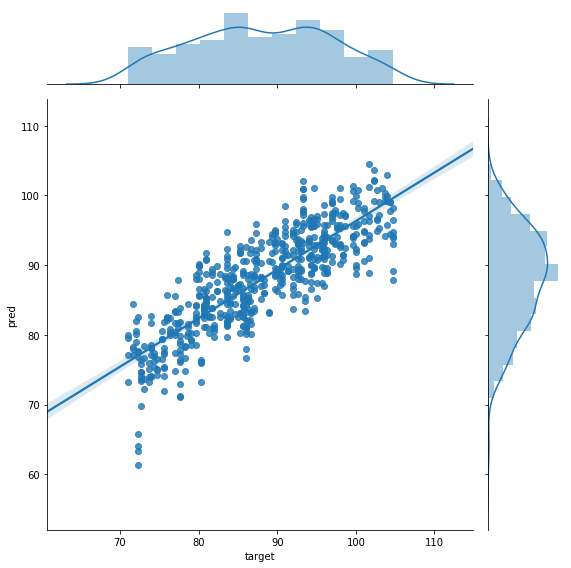

In [324]:
sns.jointplot(x='target', y='pred', data=df, kind='reg', size=8, stat_func=None)
plt.show()

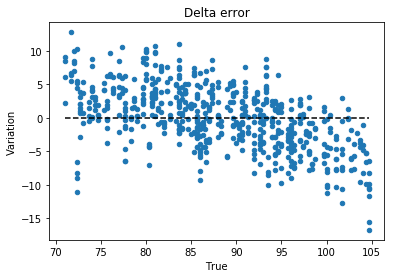

,delta
count,591.000000
mean,-0.016889
std,4.742319
min,-16.748259
25%,-3.259806
50%,0.180461
75%,3.273153
max,12.759515


In [325]:
df.plot.scatter('target', 'delta')
plt.plot([df['target'].min(), df['target'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error')
plt.xlabel('True')
plt.ylabel('Variation')
plt.show()
df[['delta']].describe()

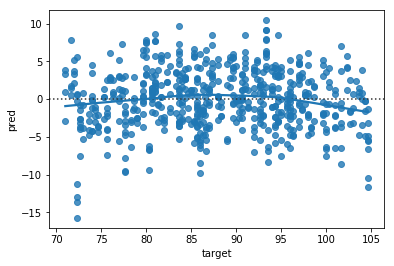

In [326]:
sns.residplot(x='target', y='pred', data=df, lowess=True)

In [328]:
df['delta'].max()

12.759515432870387

In [322]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [.1, .25, .5 ,1 ,2 ,3 ,4 ,6 ,8, 10]:
    correctcount = df[df['deltaabs'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 591
prediction +/- 0.1 : percent 01.52 %
prediction +/- 0.2 : percent 04.57 %
prediction +/- 0.5 : percent 09.31 %
prediction +/- 1.0 : percent 16.58 %
prediction +/- 2.0 : percent 31.13 %
prediction +/- 3.0 : percent 46.36 %
prediction +/- 4.0 : percent 59.39 %
prediction +/- 6.0 : percent 78.68 %
prediction +/- 8.0 : percent 91.03 %
prediction +/- 10.0 : percent 96.79 %
